<a href="https://colab.research.google.com/github/SamarthJ03/Disaster-Tweets-Analysis/blob/main/Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import sklearn
import nltk

**Exploring and Cleaning the Data**

In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
df.describe(include="all")

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df["keyword"].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

Filling null values

In [ ]:
df[df["target"] == 0]["keyword"].fillna("body%20bags",inplace = True)

<ipython-input-8-9b13f1cd23de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["target"] == 0]["keyword"].fillna("body%20bags",inplace = True)


In [ ]:
df[df["target"] == 1]["keyword"].fillna("derailment",inplace=True)

<ipython-input-9-da35dea2bd60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["target"] == 1]["keyword"].fillna("derailment",inplace=True)


In [ ]:
df["target"].isnull().sum()

0

In [ ]:
df[~df["location"].isnull()]["location"].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [ ]:
df[df["target"] == 0]["location"].value_counts()

New York                55
USA                     37
London                  29
United States           23
Los Angeles, CA         18
                        ..
Chicago,Illinois         1
Philadelphia, PA         1
NYC area                 1
Durban, South Africa     1
Lincoln                  1
Name: location, Length: 2142, dtype: int64

In [ ]:
df[df["target"] == 1]["location"].value_counts()

USA                           67
United States                 27
Nigeria                       22
India                         20
Mumbai                        19
                              ..
Brisbane.                      1
Northern Ireland               1
Broomfield, CO                 1
KÌ¦ln, Nordrhein-Westfalen     1
Manhattan, NY                  1
Name: location, Length: 1513, dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5080 entries, 31 to 7581
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5080 non-null   int64 
 1   keyword   5080 non-null   object
 2   location  5080 non-null   object
 3   text      5080 non-null   object
 4   target    5080 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 238.1+ KB


In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
txt = ' '.join(df[df["target"] == 1]["keyword"])

In [ ]:
len(txt)

22868

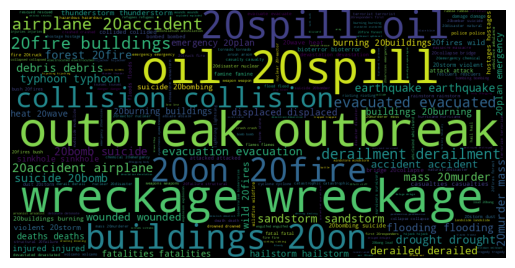

In [ ]:
wc = WordCloud(width = 800,height = 400).generate(txt)
plt.imshow(wc)
plt.axis('off')
plt.show()

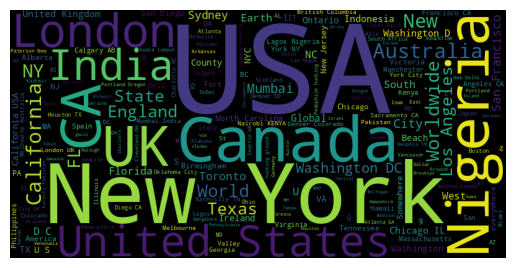

In [ ]:
txt1 = ' '.join(df[df["target"] == 1]["location"])
wc1 = WordCloud(width = 800,height = 400).generate(txt1)
plt.imshow(wc1)
plt.axis('off')
plt.show()

**Preprocessing the Data**

Removing stopwords, emojis, url from data

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import string,time
from nltk.corpus import stopwords
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)
exclude = string.punctuation
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text
def remove_stopwords(text):
    new_text = []

    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



In [ ]:
df["text"] = df["text"].apply(remove_html_tags)
df["text"] = df["text"].apply(remove_punc)
df["text"] = df["text"].apply(remove_stopwords)
df["text"] = df["text"].apply(remove_emoji)

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Lemmatizing the data**

In [ ]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()
df["text"] = df["text"].apply(lambda x: lemma.lemmatize(x) ).apply(lambda x:"".join(x))

In [ ]:
df["text"]

31      bbcmtd Wholesale Markets ablaze httptcolHYXEOHY6C
32      We always try  bring  heavy metal RT httptcoYA...
33      AFRICANBAZE Breaking newsNigeria flag set abla...
34                                  Crying    Set  ablaze
35      On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
                              ...                        
7575          On  bright side I wrecked httptcouEa0txRHYs
7577    widda16 Hes gone You  relax I thought  wife  w...
7579    Three days   work  theyve pretty much   wrecke...
7580    FX forex trading Cramer Igers 3 words  wrecked...
7581    engineshed Great atmosphere   British Lion gig...
Name: text, Length: 5080, dtype: object

Converting into vectors

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(ngram_range = (1,3),max_features=50000)
cltr = cv.fit_transform(df["text"])

In [ ]:
cltr

<5080x50000 sparse matrix of type '<class 'numpy.int64'>'
	with 101301 stored elements in Compressed Sparse Row format>

Model Building and Training

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.model_selection import cross_validate
# scoring = ['precision_macro', 'recall_macro','f1_macro']
# Ad = AdaBoostClassifier(n_estimators = 100)
# Ad.fit(cltr,df["target"])
# # Ad.score(cltr,df["target"])
# cv = cross_validate(Ad,cltr,df["target"],cv = 10,scoring = scoring)



In [ ]:
# sorted(cv.keys())

In [ ]:
# print(cv['test_f1_macro'].mean())
# print(cv['test_precision_macro'].mean())
# print(cv['test_recall_macro'].mean())

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# Ad.fit(cltr,df["target"])
# y_pred = Ad.predict(cltr)
# print(confusion_matrix(df["target"],y_pred))
# print(classification_report(df["target"],y_pred))

In [ ]:
# from sklearn.model_selection import GridSearchCV

# p = {"n_estimators":[100,500],
#               "learning_rate" : [1,0.1,0.01]}
# gv = GridSearchCV(Ad,p,scoring = "f1",cv=5)
# gv.fit(cltr,df["target"])

In [ ]:
#gv.best_params_

In [ ]:
#gv.best_score_

In [ ]:
# Ad1 = AdaBoostClassifier(n_estimators = 500)
# cv1 = cross_validate(Ad1,cltr,df["target"],cv = 10,scoring = scoring)
# print(cv1['test_f1_macro'].mean())
# print(cv1['test_precision_macro'].mean())
# print(cv1['test_recall_macro'].mean())

In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# nb = MultinomialNB()
# cv2 = cross_validate(nb,cltr,df["target"],cv = 5,scoring = scoring)

In [ ]:
# print(cv2['test_f1_macro'].mean())
# print(cv2['test_precision_macro'].mean())
# print(cv2['test_recall_macro'].mean())

In [ ]:
# from sklearn.naive_bayes import ComplementNB
# nb1 = ComplementNB()
# cv3 = cross_validate(nb1,cltr,df["target"],cv = 5,scoring = scoring)

In [ ]:
# print(cv3['test_f1_macro'].mean())
# print(cv3['test_precision_macro'].mean())
# print(cv3['test_recall_macro'].mean())

In [ ]:
# from sklearn.svm import SVC
# sv = SVC()
# cv4 = cross_validate(sv,cltr,df["target"],cv = 5,scoring = scoring)

In [ ]:
# print(cv4['test_f1_macro'].mean())
# print(cv4['test_precision_macro'].mean())
# print(cv4['test_recall_macro'].mean())

In [ ]:
# sv.fit(cltr,df["target"])
# y_pred1 = sv.predict(cltr)
# print(confusion_matrix(df["target"],y_pred))
# print(classification_report(df["target"],y_pred))

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import StratifiedKFold
# svc_model_1 = SVC()

# param_grid = {"C": np.arange(1,50),
#              "kernel":["linear",'poly','rbf','sigmoid']}

# kfold = StratifiedKFold(n_splits=3,shuffle=True,random_state=10)

# rscv_svc_model = RandomizedSearchCV(svc_model_1, param_grid, cv=kfold)

# rscv_svc_model.fit(cltr, df["target"])
# rscv_svc_model.best_estimator_

In [ ]:
# sv2 = rscv_svc_model.best_estimator_
# sv2.fit(cltr,df["target"])
# y_pred2 = sv2.predict(cltr)
# print(confusion_matrix(df["target"],y_pred2))
# print(classification_report(df["target"],y_pred2))

In [ ]:
df_test = pd.read_csv("/content/test.csv")

In [ ]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


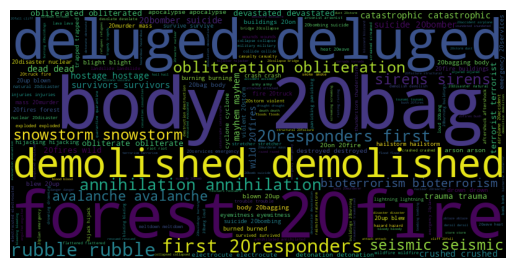

In [ ]:
txt3 = ' '.join(df_test[~df_test["keyword"].isnull()]["keyword"])
wc3 = WordCloud(width = 800,height = 400).generate(txt3)
plt.imshow(wc3)
plt.axis('off')
plt.show()

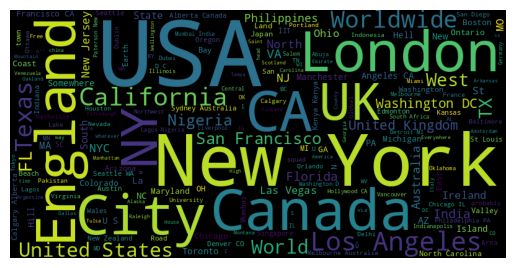

In [ ]:
txt4 = ' '.join(df_test[~df_test["location"].isnull()]["location"])
wc4 = WordCloud(width = 800,height = 400).generate(txt4)
plt.imshow(wc4)
plt.axis('off')
plt.show()

In [ ]:
df_test["text"] = df_test["text"].apply(remove_html_tags)
df_test["text"] = df_test["text"].apply(remove_punc)
df_test["text"] = df_test["text"].apply(remove_stopwords)
df_test["text"] = df_test["text"].apply(remove_emoji)

In [ ]:
df_test["text"] = df_test["text"].apply(lambda x: lemma.lemmatize(x) ).apply(lambda x:"".join(x))

In [ ]:
df_test["text"]

0                       Just happened  terrible car crash
1       Heard  earthquake  different cities stay safe ...
2          forest fire  spot pond geese  fleeing acros...
3                   Apocalypse lighting Spokane wildfires
4                Typhoon Soudelor kills 28  China  Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm  RI worse  last hurricane My cityamp3oth...
3260     Green Line derailment  Chicago httptcoUtbXLcBIuY
3261    MEG issues Hazardous Weather Outlook HWO httpt...
3262    CityofCalgary  activated  Municipal Emergency ...
Name: text, Length: 3263, dtype: object

In [ ]:
cv = CountVectorizer(ngram_range = (1,3),max_features = 50000)
cltest = cv.fit_transform(df_test["text"])

In [ ]:
# y_predicted = sv2.predict(cltest)

In [ ]:
#pd.DataFrame(y_predicted).to_csv('submission2.csv')

In [ ]:
#a = pd.read_csv("/content/submission.csv")


In [ ]:
#a.head()

**Trying out Neural Network**

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self,input,hidden):
    super(NeuralNet,self).__init__()
    self.lin1 = nn.Linear(input,hidden)
    self.relu = nn.ReLU()
    self.dropout1 = nn.Dropout(0.2)
    self.lin2 = nn.Linear(hidden,hidden)
    self.relu2 = nn.ReLU()
    self.dropout2 = nn.Dropout(0.2)
    self.lin3 = nn.Linear(hidden,1)

  def forward(self,x):
    out = self.lin1(x)
    out = self.relu(out)
    out = self.dropout1(out)
    out = self.lin2(out)
    out = self.relu2(out)
    out = self.dropout1(out)
    out = self.lin3(out)
    out = torch.sigmoid(out)
    return out

In [ ]:
cltr = torch.from_numpy(cltr.todense())

In [ ]:
cltr = cltr.to(torch.float32)

In [ ]:
cltr.shape

torch.Size([5080, 50000])

In [ ]:
cltest = torch.from_numpy(cltest.todense())

In [ ]:
cltest = cltest.to(torch.float32)

In [ ]:
yp = df["target"]
yp = torch.from_numpy(np.array(yp).reshape(yp.shape[0],1))
yp = yp.to(torch.float32)

In [ ]:
input = cltr.shape[1]
hidden = 512

In [ ]:
model = NeuralNet(input,hidden)
weight_decay =1e-4

In [ ]:
num_epochs = 10
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay = weight_decay)

# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(cltr)
    loss = criterion(y_pred, yp)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 1 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


# with torch.no_grad():
#     y_predicted = model(cltr)
#     y_predicted_cls = y_predicted.round()
#     acc = y_predicted_cls.eq(yp).sum() / float(yp.shape[0])
#     print(f'accuracy: {acc.item():.4f}')

epoch: 1, loss = 0.6950
epoch: 2, loss = 0.7475
epoch: 3, loss = 0.4067
epoch: 4, loss = 0.3073
epoch: 5, loss = 0.2069
epoch: 6, loss = 0.1041
epoch: 7, loss = 0.0467
epoch: 8, loss = 0.0338
epoch: 9, loss = 0.0297
epoch: 10, loss = 0.0334


In [ ]:
with torch.no_grad():
    y_predicted = model(cltr)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(yp).sum() / float(yp.shape[0])
    print(f'accuracy: {acc.item():.4f}')

accuracy: 0.9915


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
with torch.no_grad():
    y_pred1 = model(cltr)
    y_pred1_cls = y_pred1.round()
print(confusion_matrix(yp,y_pred1_cls))
print(classification_report(yp,y_pred1_cls))

[[2868   16]
 [  25 2171]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2884
         1.0       0.99      0.99      0.99      2196

    accuracy                           0.99      5080
   macro avg       0.99      0.99      0.99      5080
weighted avg       0.99      0.99      0.99      5080



In [ ]:
with torch.no_grad():
    y_pred2 = model(cltest)
    print(y_pred2)

tensor([[0.6805],
        [0.9611],
        [0.0336],
        ...,
        [0.9862],
        [0.0067],
        [0.8914]])
